# Experimenting with PyTorch

For using PyTorch you can either use your own Computer or [Google Colab](https://colab.research.google.com/).

You need to install the [PyTorch](https://pytorch.org/) package which comes with some extra dependencies.

Install the following packages for this notebook:
- **PyTorch**
- **torchvision**
- **tqdm**
- **matplotlib**

If your computer is equpped with a GPU you can also install the GPU version of PyTorch. Otherwise install the CPU version, which is smaller in size and enough for the tasks of this practical.

For using the GPU version you need to fullfill some prerequisites first, which are a little time consuming.
- Make sure that your graphics card is new enough to handle the PyTorch environment. This can be checked by searching for the compute capability of your GPU and the compute capability requirements from the PyTorch module
- Install the latest NVIDIA driver
- Install suitable CUDA version
- Install CudNN
- Install PyTorch after all previous successful steps


Using Google Colab should avoid installing the above mentioned prerequisites.

## PyTorch Operations

In [8]:
import torch
import torch.nn as nn

# Tensors

# Initialize a 1d torch tensor of size (6, 1) and name it 'data'. Initialize the tensor as random normal distribution

# Code here
data = torch.randn(6,1)



# Convert the torch tensor to a numpy array and convert it back afterwards. Keep the variable naming and just override the variable every time

# Code here
data = data.numpy()
print(f"Numpy Array: {data}")
data = torch.from_numpy(data)
print(f"Torch Tensor Array: {data}")


# Tensors have a shape, a data type and are executed on some device on your computer. Find the mentioned tensor attributes and print them.

# Code here
print(f"Shape: {data.shape}")
print(f"Type: {data.dtype}")
print(f"Device: {data.device}")


# Slicing works the same as with numpy arrays. No need to learn a new syntax here :)
# Try some slicing methods (i. e. the slicing methods we discussed in the first practical)

# Code here
slice_1 = data[0:5, -1]
print(f"Slice1: {slice_1}")
slice_2 = data[-1, :]
print(f"Slice2: {slice_2}")
slice_3 = data[1::2, 0]
print(f"Slice3: {slice_3}")


###
# Arithmetic operations
###

# Perform a matrix multiplication with two random tensors of different shape. The value initialization is of your choice.

# Code here
tensor_a = torch.randn(2, 3)
print(f"TensorA: {tensor_a}")

tensor_b = torch.randn(3, 4)
print(f"TensorB: {tensor_b}")

result = torch.matmul(tensor_a, tensor_b)
print(f"Multiplication: {result}")


# Perform the hadamard (element-wise) product with two random initialized tensors.

# Code here
tensor_c = torch.randn(2,2)
print(f"TensorC: {tensor_c}")

tensor_d = torch.randn(2,2)
print(f"TensorD: {tensor_d}")

result = tensor_c * tensor_d
print(f"Element Wise: {result}")



# For more useful tensor operations, plese check out their website: https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

Numpy Array: [[ 0.78104657]
 [ 0.6895362 ]
 [-0.5942594 ]
 [ 0.9869146 ]
 [ 1.6282034 ]
 [ 0.9405896 ]]
Torch Tensor Array: tensor([[ 0.7810],
        [ 0.6895],
        [-0.5943],
        [ 0.9869],
        [ 1.6282],
        [ 0.9406]])
Shape: torch.Size([6, 1])
Type: torch.float32
Device: cpu
Slice1: tensor([ 0.7810,  0.6895, -0.5943,  0.9869,  1.6282])
Slice2: tensor([0.9406])
Slice3: tensor([0.6895, 0.9869, 0.9406])
TensorA: tensor([[ 1.2371,  1.2850, -1.2217],
        [ 0.2899, -0.0540,  0.0033]])
TensorB: tensor([[ 0.5321,  0.3738,  1.4336, -0.8502],
        [ 1.1178,  1.1776, -1.0299, -1.5111],
        [-0.2748,  0.2761,  0.1442,  0.0311]])
Multiplication: tensor([[ 2.4303,  1.6383,  0.2739, -3.0314],
        [ 0.0930,  0.0457,  0.4717, -0.1647]])
TensorC: tensor([[ 0.0145,  0.4095],
        [ 0.6612, -0.5528]])
TensorD: tensor([[-0.2790, -0.9210],
        [-1.4748, -1.6989]])
Element Wise: tensor([[-0.0040, -0.3771],
        [-0.9751,  0.9391]])


## PyTorch Sequential and Layers

In [9]:
# We now build our first neural network layers and combine them into one model

# First lets define an example Linear layer.
# Initialize a Linear layer from PyTorch of dimension (in_features=16, out_features=32).

# Code here
layer = nn.Linear(in_features=16, out_features=32)


# Print the layer attributes and print the weight of the Linear layer
# Forward a fitting random initialized 2d tensor through the layer and print the result
# What is the shape of the passed (forwarded) random tensor?

# Code here
print(f"Layer: {layer}")
print(f"Weight of Layer: {layer.weight}")

# random 2d tensor
input = torch.randn(4, 16)

# forward pass
output = layer(input)

print(f"Output after forward pass: {output}")
print(f"Shape: {output.shape}")


# Why does it work to just call an initialized layer by initialized_layer(input)?
# Check the source code for the Linear Layer and its parent 'Module' class here: https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear
# Explain in your own words why the forward function of the 'Linear' class is automatically called when passing an input through the layer, i. e. initialized_layer(input)
# Hint: Check out the class inheritance!

# Your explanation here
# When we are initializing a layer through nn.Linear and then calling it with an input, we are invoking a __call__ method
# Forward function is automatically called because of the input we pass to the Module (in this case it is Linear)


# Build a sequential model with some linear layers stacked after each other. The number of layers is your choice, but be careful because it could cost a lot of time
# to pass data through the sequential model afterwards. Start e. g. with three linear layers :)
# You are not restricted to linear layers. Experiment a little bit here!

# Code here
model = nn.Sequential(
    nn.Linear(784, 32),  # input layer (do not change the in_features size of this layer - we need it later)
    # your layers
    nn.Linear(32, 10)  # you can change the in_features of this layer but let the out_features at size 10 here - we need it layer
)
print(f"Model: \n{model}")


Layer: Linear(in_features=16, out_features=32, bias=True)
Weight of Layer: Parameter containing:
tensor([[ 0.1347, -0.2457,  0.1130,  0.1271, -0.1047, -0.1013, -0.1368,  0.2022,
          0.0661, -0.1726,  0.2174,  0.2026,  0.0612,  0.1608, -0.2373, -0.0650],
        [-0.2443,  0.0154,  0.0773, -0.0662,  0.0367, -0.0072, -0.1493, -0.2162,
          0.1317,  0.0918,  0.0048, -0.0440, -0.0442, -0.1479, -0.1198,  0.0649],
        [ 0.0777, -0.2412,  0.0467,  0.2249, -0.0083,  0.0512, -0.0103, -0.1767,
         -0.1162, -0.0370, -0.0784,  0.1421,  0.0448,  0.1596, -0.0639, -0.2179],
        [-0.1569,  0.1612,  0.0834, -0.0443,  0.2000,  0.0798, -0.0607, -0.1404,
         -0.0337, -0.1765,  0.0203, -0.1239,  0.0259, -0.0917, -0.2364,  0.1803],
        [-0.1054, -0.2293, -0.0201,  0.0607, -0.0131,  0.2360, -0.1729, -0.0092,
         -0.1011,  0.0769,  0.0191, -0.0464,  0.0196,  0.1908, -0.1492,  0.2465],
        [-0.0920, -0.2194, -0.1360, -0.1563,  0.2074, -0.2065, -0.0774,  0.2077,
       

## PyTorch Forward Pass

Data: 
tensor([[-1.3427, -1.1554, -1.6629,  ..., -1.7823, -0.6915,  0.7108],
        [-0.3047,  0.0372, -1.0374,  ..., -0.5332, -0.8153,  0.5508],
        [ 0.6148,  0.8266, -2.6018,  ...,  2.0162,  0.2203,  0.2922],
        [-0.4416,  0.1026, -0.1778,  ..., -2.8853, -0.6033,  1.0088],
        [-0.9524,  1.1397, -0.9669,  ..., -1.0141, -0.4408,  2.3167]])
Output: 
tensor([[-0.4855,  0.2118,  0.3342,  0.1344,  1.0247,  0.5006,  0.2500,  0.5091,
         -0.2670, -0.2367],
        [-0.2360,  1.0135,  0.0352,  0.6880,  0.3433,  0.4334,  0.2968,  1.1326,
         -0.0584,  0.0186],
        [ 0.1423,  0.0838, -0.3979,  0.1080,  0.4041,  0.4671,  0.1904, -0.0684,
          0.2462, -0.1559],
        [-0.0816,  0.0413,  0.0317, -0.2672, -0.3949,  0.2872,  0.4651,  0.4121,
         -0.0825, -0.1804],
        [-0.0297, -0.0228, -0.2338, -0.0280, -0.5789,  0.0589,  0.1739, -0.6713,
         -0.0811,  0.4149]], grad_fn=<AddmmBackward0>)
Output Shape: torch.Size([5, 10])


Saving mnist_9.jpg to mnist_9.jpg
torch.Size([1, 28, 28])


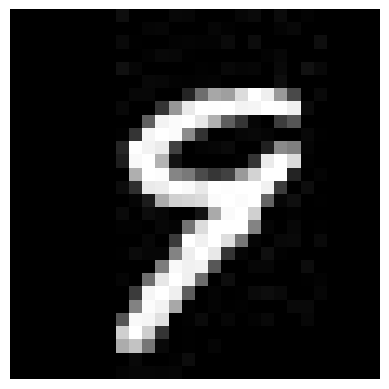

In [15]:
# We initialized our model in the previous section
# Lets now also use the model to pass data through it

# Use the following tensor and pass it through your model from above
# You have to 'reformat' the tensor first
data = torch.randn(size=(5, 1, 28, 28))

# Code here
data = data.view(data.size(0), -1)
print(f"Data: \n{data}")

output = model(data)
print(f"Output: \n{output}")
print(f"Output Shape: {output.shape}")

# read the image 'mnist_9.jpg' from the downloaded folder with the 'torchvision' python package and pass it through the network
# How does the tensor of the image looks like? Which information is in the different dimensions?

# Code here
from PIL import Image
from torchvision import transforms
from google.colab import files

uploaded = files.upload()

image_path = "mnist_9.jpg"
img = Image.open(image_path)
transform = transforms.ToTensor()
image = transform(img)

print(image.shape)

# visualize the image from above with matplotlib
import matplotlib.pyplot as plt

# Code here
image = image.reshape(28,28,1)
plt.imshow(image, cmap="gray")
plt.axis(False)
plt.show()

## PyTorch Neural Network Example Implementation

In [ ]:
# This is only the application of your defined model
# You can use the following method to train your model and check its accuracy. You can also use parts of the code below for the following practicals.
# Just execute this box and it uses the predefined model from the previous task to run a training procedure. The variable name of the model must be 'model' (or change it accordingly).
# ATTENTION: No worries if you don't understand the implementation. This is just for showing you how your defined model performs in terms of accuracy.
# We will discuss everything in this code in future practicals.

# Refine your model multiple times and see how the different models perform in terms of accuracy.

# We use the MNIST dataset to set the model
import torchvision
import torchvision.transforms as transforms
import tqdm

def load_mnist_data(root_path='./data', batch_size=4):
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))]
    )

    trainset = torchvision.datasets.MNIST(root=root_path, train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root=root_path, train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader  , testloader


def train_model(model, batch_size: int = 4, epochs: int = 10):
    # we only consider the mnist train data for this example
    train_loader, _ = load_mnist_data(root_path='./data', batch_size=batch_size)

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    model = model.to(device=device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        running_loss = 0.0
        running_accuracy = []
        for imgs, targets in tqdm.tqdm(train_loader, desc=f'Training iteration {epoch + 1}'):
            imgs, targets = imgs.to(device=device), targets.to(device=device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(imgs.reshape(imgs.shape[0], -1))
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()

            # Calculate the Accuracy (how many of all samples are correctly classified?)
            max_outputs = torch.max(outputs, dim=1).indices
            accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
            running_accuracy.append(accuracy)

        print(f'Epoch {epoch + 1} finished with loss: {running_loss / len(train_loader):.3f} and accuracy {torch.tensor(running_accuracy).mean():.3f}')


# Run the model training with the name of your model variable, in this case 'model'
train_model(model=model, batch_size=4, epochs=10)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 350kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.76MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.56MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Training iteration 1: 100%|██████████| 15000/15000 [01:16<00:00, 196.40it/s]


Epoch 1 finished with loss: 0.430 and accuracy 0.871


Training iteration 2: 100%|██████████| 15000/15000 [01:14<00:00, 200.41it/s]


Epoch 2 finished with loss: 0.363 and accuracy 0.896


Training iteration 3: 100%|██████████| 15000/15000 [01:15<00:00, 198.29it/s]


Epoch 3 finished with loss: 0.347 and accuracy 0.900


Training iteration 4: 100%|██████████| 15000/15000 [01:15<00:00, 197.88it/s]


Epoch 4 finished with loss: 0.338 and accuracy 0.902


Training iteration 5: 100%|██████████| 15000/15000 [01:17<00:00, 193.42it/s]


Epoch 5 finished with loss: 0.330 and accuracy 0.905


Training iteration 6: 100%|██████████| 15000/15000 [01:13<00:00, 203.28it/s]


Epoch 6 finished with loss: 0.326 and accuracy 0.907


Training iteration 7: 100%|██████████| 15000/15000 [01:18<00:00, 190.99it/s]


Epoch 7 finished with loss: 0.321 and accuracy 0.908


Training iteration 8: 100%|██████████| 15000/15000 [01:16<00:00, 196.73it/s]


Epoch 8 finished with loss: 0.317 and accuracy 0.911


Training iteration 9: 100%|██████████| 15000/15000 [01:16<00:00, 197.36it/s]


Epoch 9 finished with loss: 0.315 and accuracy 0.910


Training iteration 10: 100%|██████████| 15000/15000 [01:14<00:00, 200.37it/s]

Epoch 10 finished with loss: 0.311 and accuracy 0.912
